# Principal Component Analysis (PCA)
<br><br>

The Principal Component Analysis algorithm (here on out PCA) can be used to reduce the dimensionality of a data set. It is an **unsupervised learning** model that tries to find a subspace that minimizes what is referred to as the average projection error. 

$$ \text{Average Projection Error} = \frac{1}{m}\sum{i=1}^m ||x^{(i)} - x^{(i,proj)}||^2$$
<br>
where $x^{(i)}$ is the original point in the data and $x^{(i,proj)}$ is the location of $x^{(i)}$'s projection into the subspace. 
<br>

That is, PCA aims to minimize the sum of squared distances from each point to it's projection into the chosen subspace, i.e. line for $R^2$ or plane for $R^3$. If you recall from linear algebra, to reduce an n-dimensional matrix to k dimensions you need to find k linearly independent vectors from $R^n$ that span the entire subspace $R^k$. What you are in effect doing is discarding information that is deemed irrelevant or extraneous or at the very least not vital.
<br><br>

## So how do you tune PCA?

PCA is tuned using the parameter k. There is a trade-off between lowering k and losing information. *Variance* is used as the measure of information loss. It is worth noting that it is very important to **standardize** the data prior to conducting PCA on it. PCA finds the lower dimensions based on the covariance matrix of the features. Since the covariance matrix is sensitive to the standardization of variables, you have to standardize the data so that an equal amount of importance is assigned to each feature. Ultimately, you have to standardize the data before applying PCA to it because otherwise you may get erroneous results.<br>

A rule of thumb is to chose k such that PCA results in no more than 1% loss in the data set variance. If you define * orginal variance* as $\frac{1}{m}\sum_{i=1}^{m}||x^{(i)}||^2$, then the objective is as follows:

$$\underset{k}{\mathrm{argmin}}\quad \frac{variance\space loss}{original \space variance} \le 0.01\\
\underset{k}{\mathrm{argmin}}\quad \frac{\frac{1}{m}\sum_{i=1}^{m}||x^{(i)} - x^{(i,proj)}||^2}{\frac{1}{m}\sum_{i=1}^{m}||x^{(i)}||^2} \le 0.01$$
<br>

## Implementing PCA with sklearn

First we generate 200 random data points in 2D.

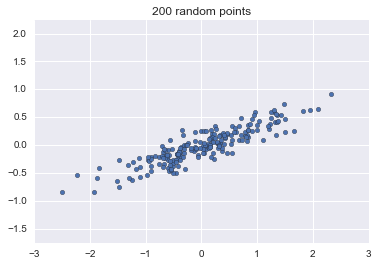

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');
plt.title('200 random points')

So if we use PCA to fit the data in $R^2$ you will see the principal component vectors and explained variance below.

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[ 0.7625315  0.0184779]


And to better understand the utility of PCA it is best to visualize the PCA components in this case. 

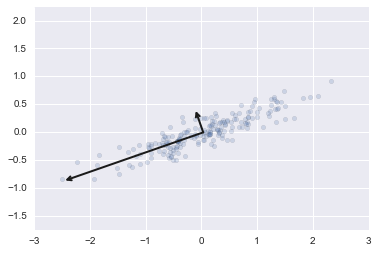

In [3]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

<br>
You can see two vectors above. These vectors represent the principal axes of the data and their length are indicative of how important said vector is in describing the data. 
<br>
### Reduce dimensionality of the data

Let's reduce this $R^2$ data set to a line and plot it against the original data (lighter dots).

original shape:    (200, 2)
transformed shape: (200, 1)


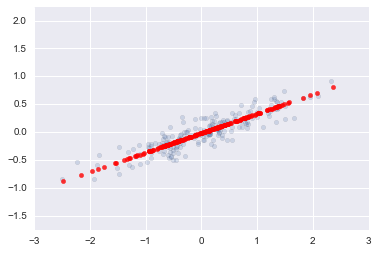

In [4]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color='red')
plt.axis('equal');

<br>
Above the result of PCA is shown by the red line. The data was reduced to a single dimension by discarding the lesser important axis and keeping only the more important one. It can also be said that PCA only kept the components, in this case only one, with the highest variance in the data. In higher dimensional problems the number of dimensions to reduce to may not be so straightforward to decide. In the graph below you can see the *cummulative explained variance* curve. What this curve is saying is that (roughly) 80% of the explained variance can be accomplished with 10 or 11 dimensions. Similarly, in order to reach 100% explained variance, you would need to keep about 45-50 dimensions/components out of the total 64 in the data set. 
<br>

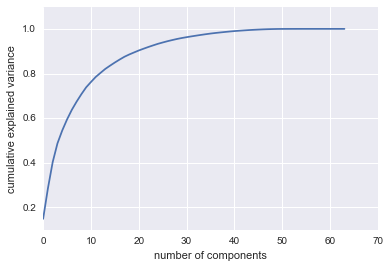

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Take away
- **Always** standardize the data before using PCA
- PCA is used to reduce dimensionality and it can also be used for noise filtering and feature selection

# Resources
- Here is a great resource on PCA with sklearn examples: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html